# Setup

In [ ]:
!pip install gdown

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
!gdown https://drive.google.com/drive/folders/1tTYmeHspNsESUe5-qOBjwLeodyVSxPb9?usp=sharing -O ~/dataset --folder

Retrieving folder list
Processing file 11lcXmCAhzu89eClIIlD2P42ehuLoDSKP complaints_processed.csv
Processing file 1z_K5OcQsPdediNK_ikli3ea1sjMHvpzo final-dataset-v2.csv
Processing file 1HyF-lkrRwRleSkoxtmBkIXRudgXz1W-i final-dataset.csv
Retrieving folder list completed
Building directory structure
Building directory structure completed
Downloading...
From: https://drive.google.com/uc?id=11lcXmCAhzu89eClIIlD2P42ehuLoDSKP
To: /root/dataset/complaints_processed.csv
100% 99.5M/99.5M [00:01<00:00, 80.5MB/s]
Downloading...
From: https://drive.google.com/uc?id=1z_K5OcQsPdediNK_ikli3ea1sjMHvpzo
To: /root/dataset/final-dataset-v2.csv
100% 97.1M/97.1M [00:00<00:00, 97.6MB/s]
Downloading...
From: https://drive.google.com/uc?id=1HyF-lkrRwRleSkoxtmBkIXRudgXz1W-i
To: /root/dataset/final-dataset.csv
100% 97.1M/97.1M [00:00<00:00, 169MB/s]
Download completed


In [ ]:
import pandas as pd
import numpy as np

# Analysing dataset

In [ ]:
dataset = pd.read_csv('~/dataset/complaints_processed.csv')
dataset = dataset.drop('Unnamed: 0', axis=1)
dataset.dropna(inplace=True, axis=0)
dataset.head()

,product,narrative
0,credit_card,purchase order day shipping amount receive pro...
1,credit_card,forwarded message date tue subject please inve...
2,retail_banking,forwarded message cc sent friday pdt subject f...
3,credit_reporting,payment history missing credit report speciali...
4,credit_reporting,payment history missing credit report made mis...


Initial size of **162420** rows

### Identifying the the Y labels

In [ ]:
product_labels = dataset['product'].unique()
product_labels

array(['credit_card', 'retail_banking', 'credit_reporting',
       'mortgages_and_loans', 'debt_collection'], dtype=object)

In [ ]:
dataset['y_target_label'] = dataset['product']

product_label_classes = {}
for index, label in enumerate(list(product_labels)):
  product_label_classes[label] = index

product_label_classes

{'credit_card': 0,
 'retail_banking': 1,
 'credit_reporting': 2,
 'mortgages_and_loans': 3,
 'debt_collection': 4}

In [ ]:
y_target_labels = []
for product in dataset['product']:
  y_target_labels.append(product_label_classes[product])

dataset['y_target_label'] = y_target_labels
dataset.head(10)

,product,narrative,y_target_label
0,credit_card,purchase order day shipping amount receive pro...,0
1,credit_card,forwarded message date tue subject please inve...,0
2,retail_banking,forwarded message cc sent friday pdt subject f...,1
3,credit_reporting,payment history missing credit report speciali...,2
4,credit_reporting,payment history missing credit report made mis...,2
5,credit_reporting,payment history missing credit report made mis...,2
6,credit_reporting,va date complaint experian credit bureau invol...,2
7,credit_reporting,account reported abbreviated name full name se...,2
8,credit_reporting,account reported abbreviated name full name se...,2
9,credit_reporting,usdoexxxx account reported abbreviated name fu...,2


### Estátisticas das ocorrências

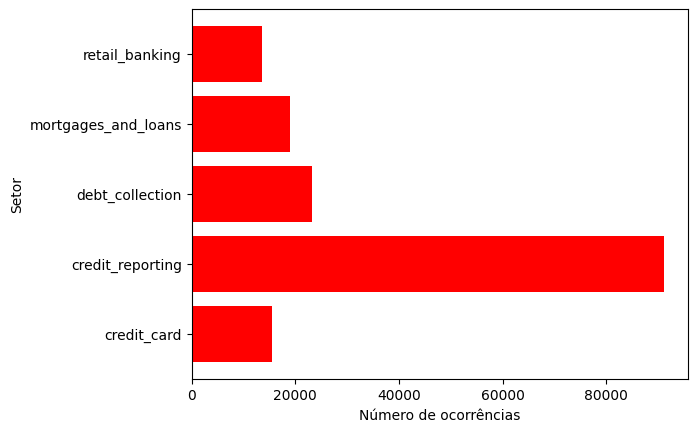

In [ ]:
import matplotlib.pyplot as plt
grouped_by_product = dataset.groupby(by=['product'])

plt.barh(
    ['credit_card', 'credit_reporting', 'debt_collection', 'mortgages_and_loans', 'retail_banking'],
    grouped_by_product.count()['narrative'],
    color='r'
  )
plt.xlabel("Número de ocorrências")
plt.ylabel("Setor")
plt.show()

### Garbage data?

In [ ]:
dataset['length_of_narrative'] = dataset['narrative'].str.len()
sorted_df = dataset.sort_values(by='length_of_narrative')

# Text Analisis

### Setup NLTK

In [ ]:
import nltk
from nltk.corpus import stopwords
from nltk.stem import *

In [ ]:
nltk.download('popular')

[nltk_data] Downloading collection 'popular'
[nltk_data]    | 
[nltk_data]    | Downloading package cmudict to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/cmudict.zip.
[nltk_data]    | Downloading package gazetteers to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/gazetteers.zip.
[nltk_data]    | Downloading package genesis to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/genesis.zip.
[nltk_data]    | Downloading package gutenberg to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/gutenberg.zip.
[nltk_data]    | Downloading package inaugural to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/inaugural.zip.
[nltk_data]    | Downloading package movie_reviews to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping corpora/movie_reviews.zip.
[nltk_data]    | Downloading package names to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/names.zip.
[nltk_data]    | Downloading package shakespeare to /root/nltk_data...
[nlt

True

### Tokenize, stopwords and stemming

In [ ]:
import re
from nltk.stem import WordNetLemmatizer

lemmatizer = WordNetLemmatizer()

stemmer = PorterStemmer()
contents_tokenized = np.array([])
stop_words = stopwords.words('english')

def stem(words):
  return [stemmer.stem(word.lower()) for word in words if word.isalpha()]

def remove_stop_words(words):
  return [word for word in words if word not in stop_words]

def remove_hashs(words):
  return [word for word in words if not re.search("xx", word)]

def tokenize(text_content):
    text_tokens = nltk.word_tokenize(text_content)
    text_without_stop_words = remove_stop_words(text_tokens)
    stemmed_words = stem(text_without_stop_words)
    removed_hash_data = remove_hashs(stemmed_words)

    return ' '.join(removed_hash_data)

newdataset = dataset.loc[:, ['narrative']].applymap(tokenize)
newdataset['narrative'].head()

0    purchas order day ship amount receiv product w...
1    forward messag date tue subject pleas investig...
2    forward messag cc sent friday pdt subject fina...
3    payment histori miss credit report special loa...
4    payment histori miss credit report made mistak...
Name: narrative, dtype: object

### Final dataset

In [ ]:
dataset['narrative_transformed'] = dataset['narrative']

final_dataset = dataset.loc[:, ['narrative_transformed', 'y_target_label']]
final_dataset.to_csv('/tmp/final-dataset.csv')

In [ ]:
from google.colab import files
files.download('/tmp/final-dataset.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
df = pd.read_csv('~/dataset/final-dataset.csv')
df.head()